In [49]:
import requests
from bs4 import BeautifulSoup
import re
import urllib
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
def get_google_links(search_term,nb_links):
    links_list=[]
    page = requests.get("https://www.google.com/search?q={}&num={}".format(search_term, nb_links))
    soup = BeautifulSoup(page.content, "html5lib")
    links = soup.findAll("a")
    for link in links :
        link_href = link.get('href')
        if "url?q=" in link_href and not "webcache" in link_href:
            links_list.append(link.get('href').split("?q=")[1].split("&sa=U")[0])
    return links_list

In [92]:
def get_page_text(url):
    header = {'User-Agent':'Mozilla/5.0'}
    try:
        html=requests.get(url,headers=header).content
    except:
        return ""
    
    soup = BeautifulSoup(html,'html5lib')
    
    for script in soup(["script", "style"]):
        script.decompose() 
    
    text = soup.get_text(" ",strip=True)    
    return text
    

In [54]:
def make_wordcloud(text):
    wc = WordCloud(background_color="white", max_words=100,stopwords=STOPWORDS, max_font_size=40, random_state=42)
    wc.generate(text)
    plt.figure(figsize=(20,10))
    plt.axis('off')
    plt.imshow(wc, interpolation="bilinear")
    plt.show()
    

In [94]:
def google_results_wordcloud(search,nblinks=10):
    links=get_google_links(search,nblinks)
    text=""
    for url in links:
        text+=get_page_text(url)
    make_wordcloud(text)

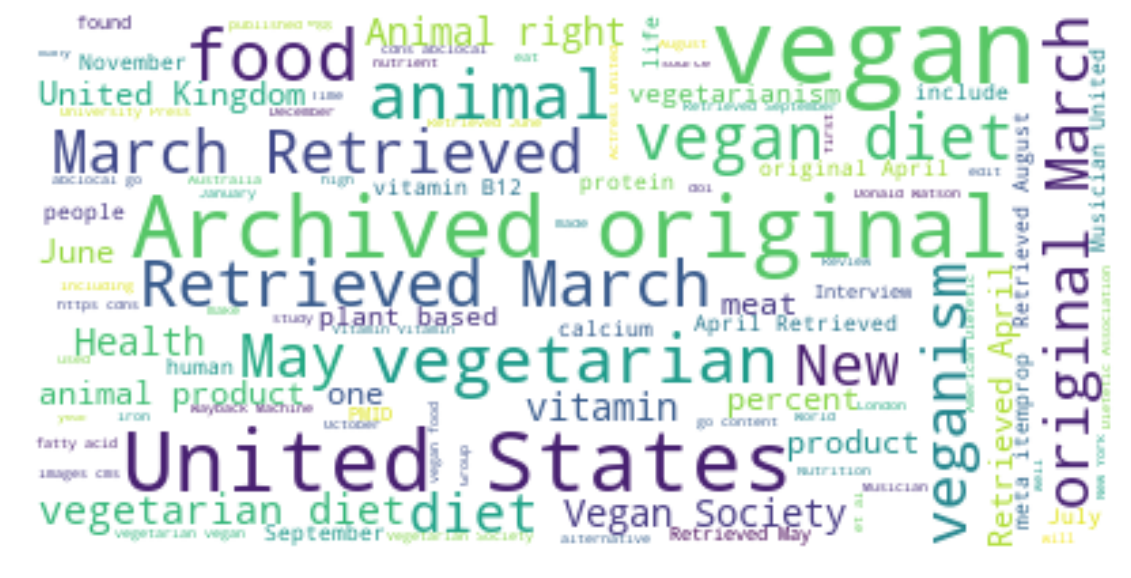

In [95]:
google_results_wordcloud("Vegan",10)

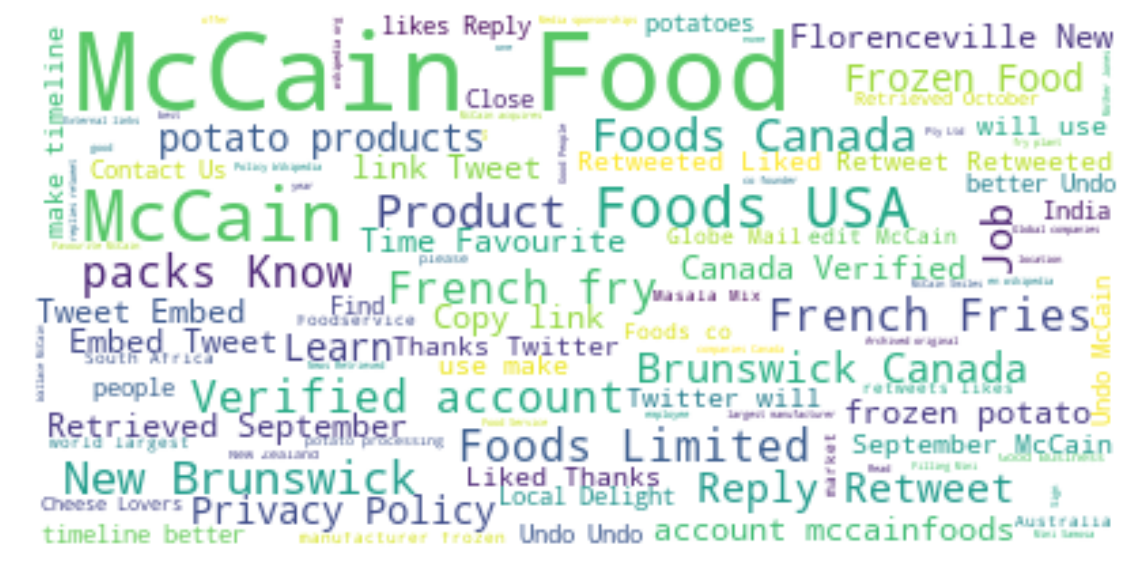

In [ ]:
google_results_wordcloud("McCain Foods",10)

In [ ]:
google_results_wordcloud("Poke",10)

In [ ]:
google_results_wordcloud("Frozen Potatoes",10)